In [1]:
import numpy as np
import glob
import pandas as pd
import seaborn as sns
from evaluate import load
perplexity = load("perplexity", module_type="metric")


/agh/projects/noelia/sebastian/miniconda3.7/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


recompute all perplexities and save them into a file

# Perplexity recalculation

In [2]:
fasta_files = glob.glob('/agh/projects/noelia/NLP/zymCTRL/transfer-learning/fastas/*.fasta')

In [3]:
fasta_list =[]
for fasta in fasta_files:
    fn = open(fasta)
    for line in fn:
        if '>' in line: 
            continue
        else:
            fasta_list.append(line)

In [4]:
results = perplexity.compute(predictions=fasta_list, model_id='nferruz/ZymCTRL')
    

Using pad_token, but it is not set yet.
100%|█████████████████████████████████████████| 587/587 [00:21<00:00, 26.98it/s]


In [5]:
ppls={}
for index,fasta in enumerate(fasta_files):
    ppls[fasta] = results['perplexities'][index]


In [6]:
import pickle
with open('/agh/projects/noelia/NLP/zymCTRL/transfer-learning/ppls.pkl', 'wb') as file:
    pickle.dump(ppls, file)

# Many vs. one sequence per group

In [22]:
perplexities = {
    'EC number': [x.split('/')[-1].split('.fasta')[0].split('_')[0] for x in ppls.keys()],
    
    'Perplexities': [x for x in ppls.values()],
    
    'Type': [x.split('/')[-1].split('.fasta')[0].split('.')[0] for x in ppls.keys()]

}
df = pd.DataFrame(perplexities)

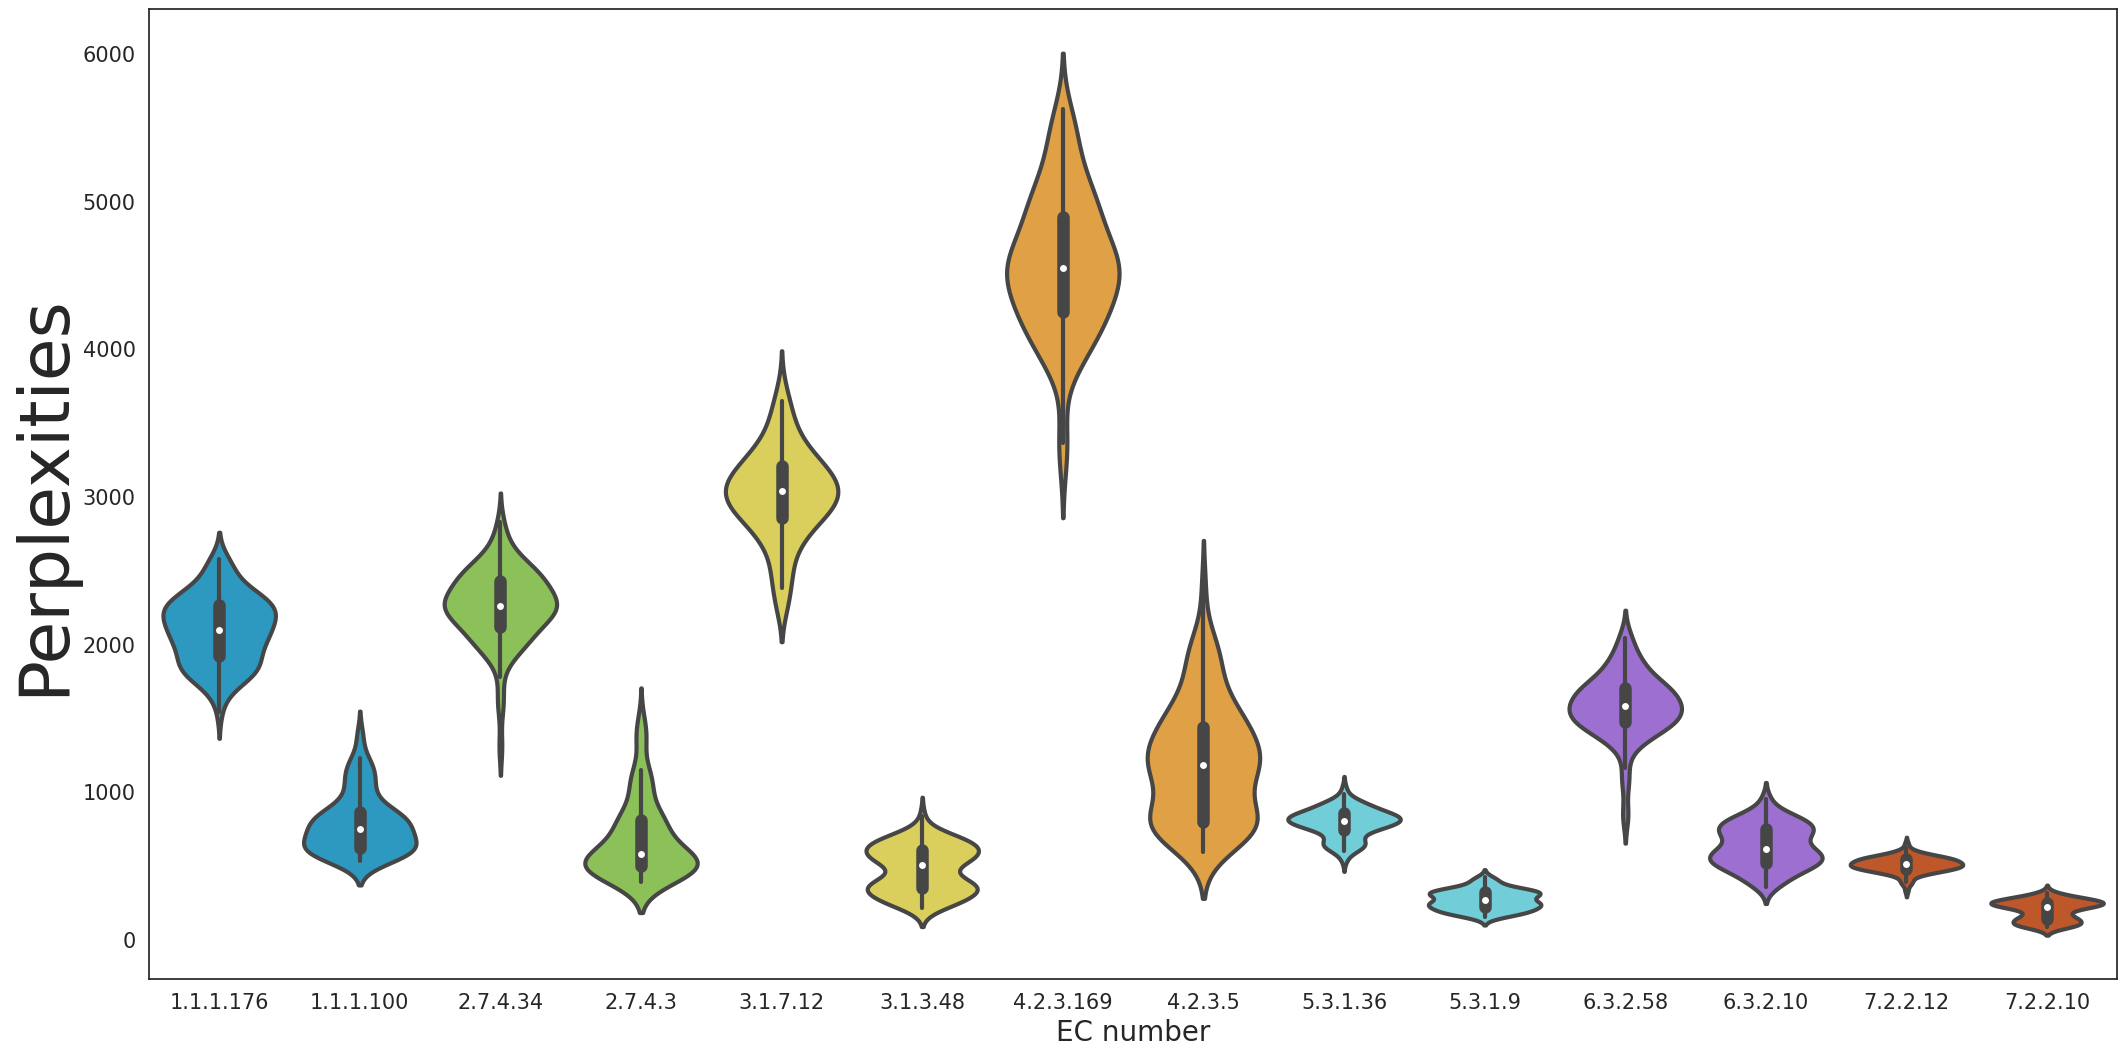

In [23]:
## replace '3.1.3.48',!!!
palette = ["#9b5fe0","#16a4d8","#60dbe8","#8bd346","#efdf48","#f9a52c","#d64e12"]

sns.set(rc={'figure.figsize':(25.4,12.6)})
sns.set_style("white")

plot = sns.violinplot(data=df, x="EC number", y="Perplexities", hue="Type", 
                      palette=sns.color_palette(palette, 7),legend=False, dodge=False, linewidth=3,
                     order=[ '1.1.1.176', '1.1.1.100', 
       '2.7.4.34','2.7.4.3',  '3.1.7.12', '3.1.3.48', '4.2.3.169', '4.2.3.5',
       '5.3.1.36', '5.3.1.9', '6.3.2.58', '6.3.2.10','7.2.2.12', '7.2.2.10'
       ])
plot.legend_.remove()

plot.set_xlabel("EC number",fontsize=20)
plot.set_ylabel("Perplexities",fontsize=50)
plot.tick_params(labelsize=15)


# Plotting by no. of members

In [24]:
first = ['1.3.1.120', '2.4.1.177', '3.4.22.64', '3.2.1.53', '2.8.2.25', '3.2.1.206', '2.7.1.232', '2.5.1.107', '5.3.1.36', '5.4.99.47']
second = ['1.1.1.191', '1.7.2.8', '1.14.14.99', '3.1.1.30', '4.2.99.24', '1.1.1.59', '2.3.1.119', '5.5.-.-', '1.14.20.2', '2.7.1.230']
third = ['4.2.3.94', '3.1.21.9', '3.4.24.88', '2.3.1.235', '2.6.1.80', '4.1.2.55', '2.3.1.36', '4.2.99.8', '3.4.21.20', '3.4.23.39']
fourth = ['4.2.3.61', '1.6.6.9', '5.3.1.n1', '4.2.1.144', '4.4.1.34', '4.1.3.18', '4.3.99.-', '3.4.21.71', '2.1.1.256', '2.3.1.246']
fifth = ['6.3.2.49', '3.4.13.20', '6.3.2.41', '3.1.1.57', '1.1.99.11', '3.5.1.13', '3.6.3.5', '3.2.1.156', '3.6.3.9', '2.1.3.6']
sixth = ['6.2.1.54', '3.6.1.15', '2.1.1.242', '2.8.5.2', '2.7.1.56', '1.2.7.3', '3.5.1.68', '2.7.1.201', '1.1.1.2', '2.6.1.39']
seventh = ['3.4.25.2', '4.1.1.65', '2.1.1.228', '3.1.13.4', '3.1.4.46', '7.1.1.1', '2.7.11.24', '4.1.2.25', '3.1.4.11', '1.1.1.94']
eighth= ['2.1.1.-', '2.7.7.6', '3.6.1.-', '5.4.99.-', '5.2.1.8', '3.1.3.48', '6.1.1.20', '2.1.1.72', '2.7.13.3', '7.1.1.2']

all_classes = first + second + third + fourth + fifth + sixth + seventh + eighth


In [25]:
dict_all_classes = {}
for item in all_classes:
    if item in first:
        dict_all_classes[item] = 'first'
    elif item in second:
        dict_all_classes[item] = 'second'
    elif item in third:
        dict_all_classes[item] = 'third'
    elif item in fourth:
        dict_all_classes[item] = 'fourth'
    elif item in fifth:
        dict_all_classes[item] = 'fifth'
    elif item in sixth:
        dict_all_classes[item] = 'sixth'
    elif item in seventh:
        dict_all_classes[item] = 'seventh'
    elif item in eighth:
        dict_all_classes[item] = 'eighth'
    else:
        print(item)

In [26]:
dict_all_classes

{'1.3.1.120': 'first',
 '2.4.1.177': 'first',
 '3.4.22.64': 'first',
 '3.2.1.53': 'first',
 '2.8.2.25': 'first',
 '3.2.1.206': 'first',
 '2.7.1.232': 'first',
 '2.5.1.107': 'first',
 '5.3.1.36': 'first',
 '5.4.99.47': 'first',
 '1.1.1.191': 'second',
 '1.7.2.8': 'second',
 '1.14.14.99': 'second',
 '3.1.1.30': 'second',
 '4.2.99.24': 'second',
 '1.1.1.59': 'second',
 '2.3.1.119': 'second',
 '5.5.-.-': 'second',
 '1.14.20.2': 'second',
 '2.7.1.230': 'second',
 '4.2.3.94': 'third',
 '3.1.21.9': 'third',
 '3.4.24.88': 'third',
 '2.3.1.235': 'third',
 '2.6.1.80': 'third',
 '4.1.2.55': 'third',
 '2.3.1.36': 'third',
 '4.2.99.8': 'third',
 '3.4.21.20': 'third',
 '3.4.23.39': 'third',
 '4.2.3.61': 'fourth',
 '1.6.6.9': 'fourth',
 '5.3.1.n1': 'fourth',
 '4.2.1.144': 'fourth',
 '4.4.1.34': 'fourth',
 '4.1.3.18': 'fourth',
 '4.3.99.-': 'fourth',
 '3.4.21.71': 'fourth',
 '2.1.1.256': 'fourth',
 '2.3.1.246': 'fourth',
 '6.3.2.49': 'fifth',
 '3.4.13.20': 'fifth',
 '6.3.2.41': 'fifth',
 '3.1.1.57': '

In [27]:
perplexities = {
    'EC number': [x.split('/')[-1].split('.fasta')[0].split('_')[0] 
                  for x in ppls.keys() if x.split('/')[-1].split('.fasta')[0].split('_')[0] in dict_all_classes],
    
    'Perplexities': [value for key,value in ppls.items() if key.split('/')[-1].split('.fasta')[0].split('_')[0] in dict_all_classes],
    
    'Type': [dict_all_classes[x.split('/')[-1].split('.fasta')[0].split('_')[0]] for x in ppls.keys() 
             if x.split('/')[-1].split('.fasta')[0].split('_')[0] in dict_all_classes]

}
df = pd.DataFrame(perplexities)

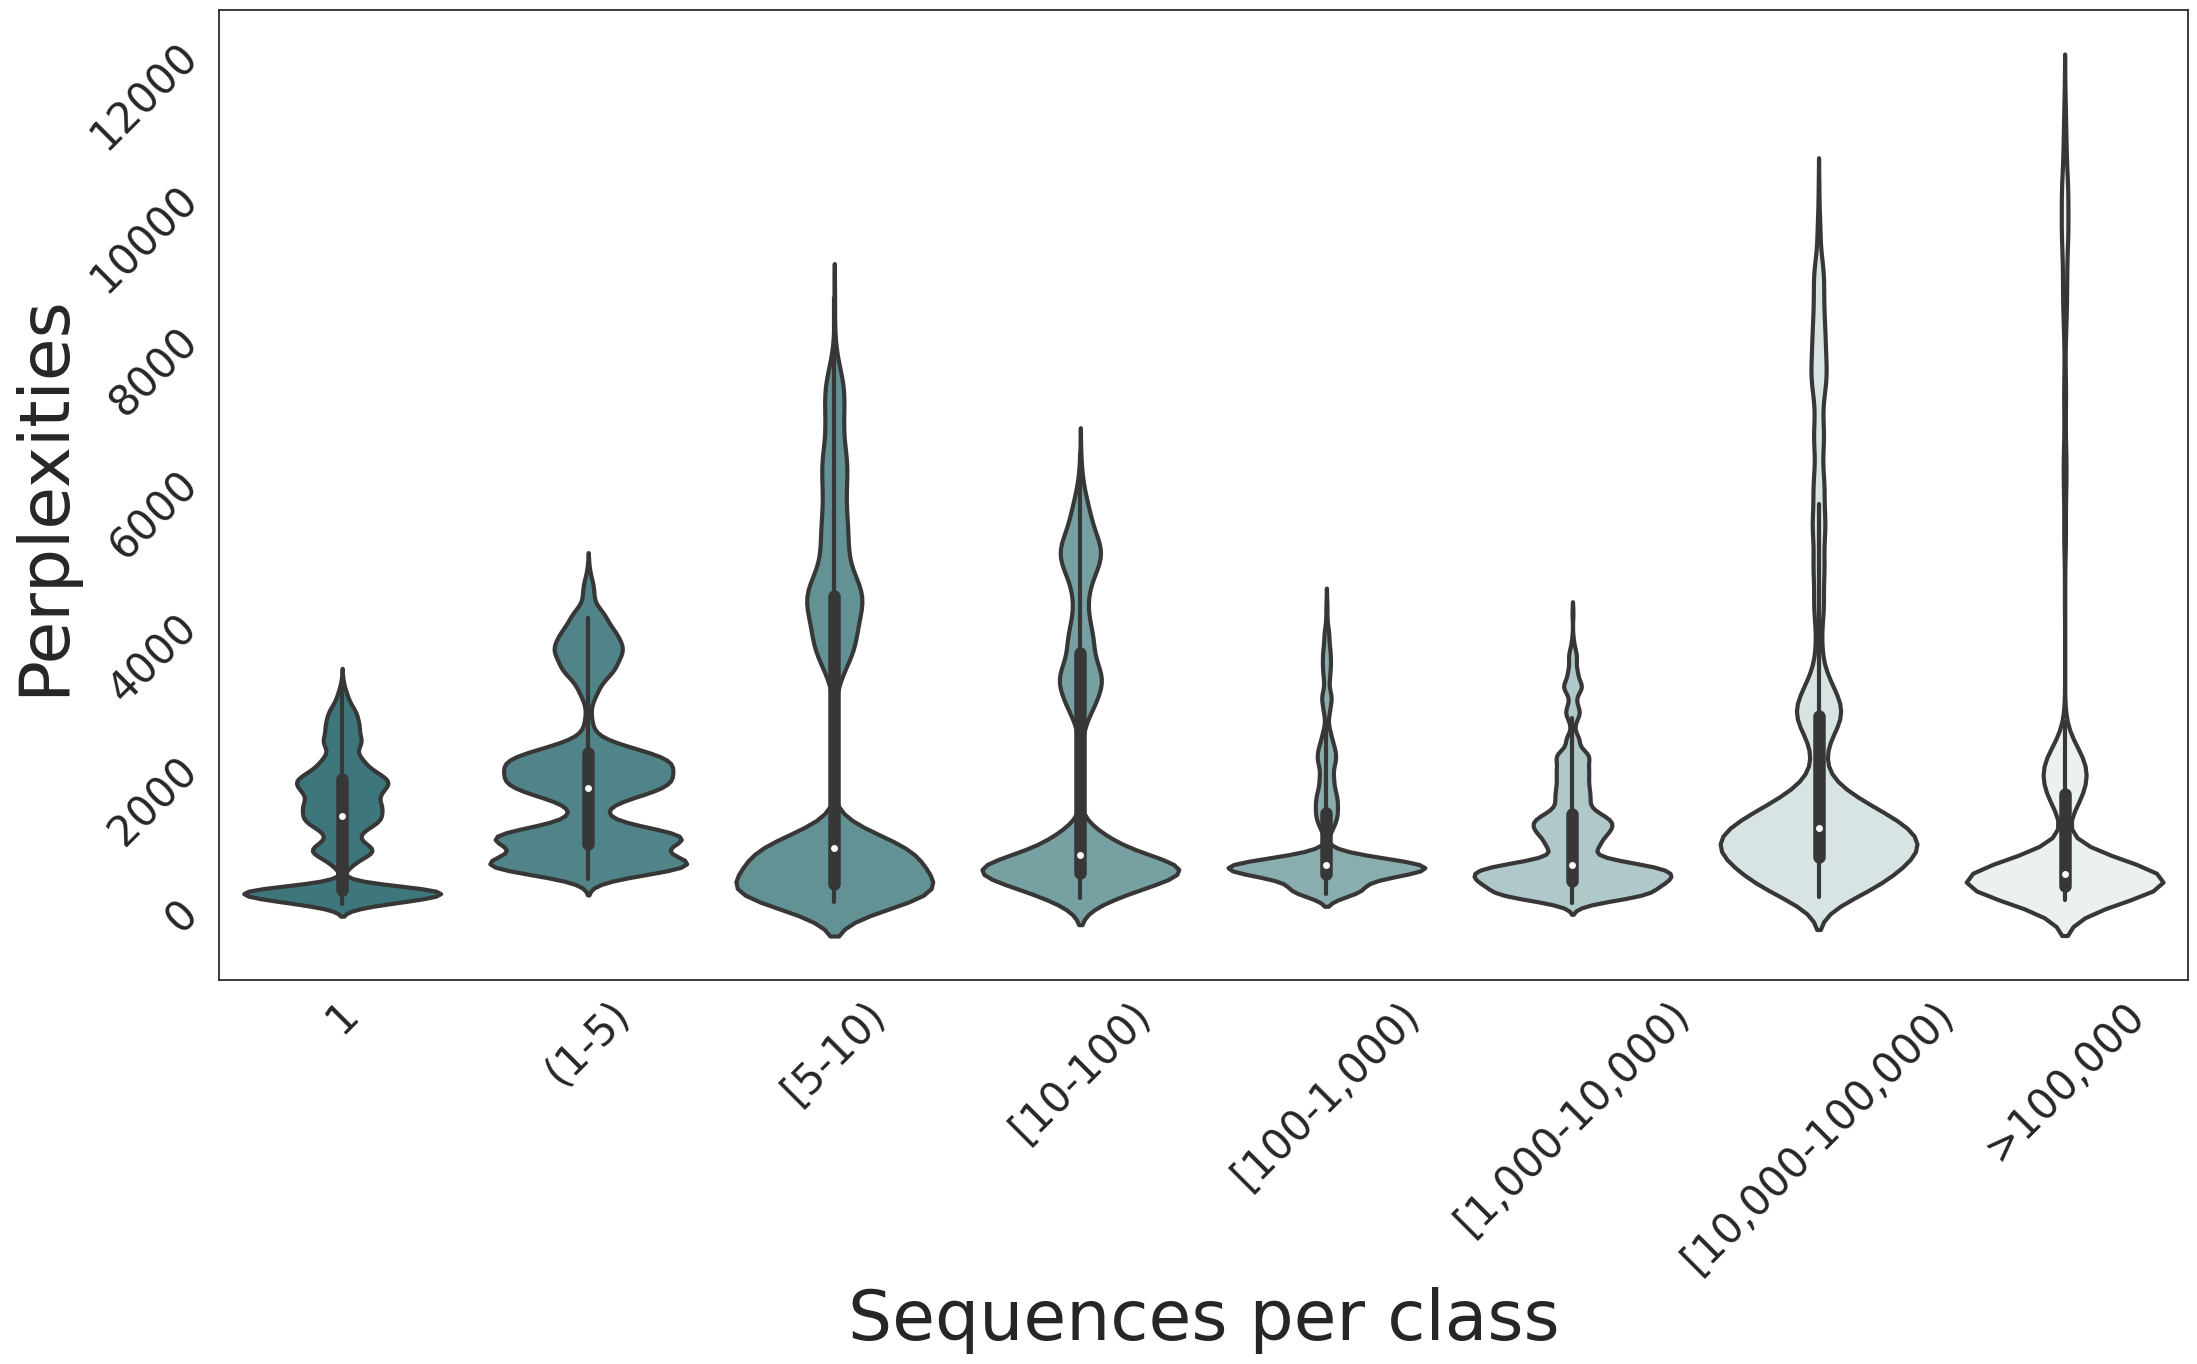

In [28]:
## replace '3.1.3.48',!!!
#palette = ["#9b5fe0","#16a4d8","#60dbe8","#8bd346","#efdf48","#f9a52c","#d64e12","#9b5fe0"]
palette = {'first':'#338085','second':'#478c91','third':'#5b999d','fourth':'#70a6a9',
           'fifth':'#84b2b5','sixth':'#adccce','seventh':'#d6e5e6','eighth':'#eaf2f2'}
#'#ccdfe0','#e5efef','#ffffff']

#palette = sns.color_palette("mako")
#sns.set_palette("Paired")

plot = sns.violinplot(data=df, x="Type", y="Perplexities", hue="Type", 
                      palette=palette,legend=False, dodge=False, linewidth=3,
                     order=['first','second','third','fourth','fifth','sixth','seventh','eighth'], bw=.1)
plot.legend_.remove()

plot.set_xlabel("Sequences per class",fontsize=50)
plot.set_ylabel("Perplexities",fontsize=50)
plot.tick_params(labelsize=30)
plot.set_xticklabels(['1','(1-5)','[5-10)','[10-100)','[100-1,000)',
                      '[1,000-10,000)','[10,000-100,000)','>100,000'])
plot.tick_params(rotation=45)

# Perplexity by class

In [10]:
perplexities = {
    'EC number': [x.split('/')[-1].split('.fasta')[0].split('_')[0] for x in ppls.keys()],
    
    'Perplexities': [x for x in ppls.values()],
    
    'Type': [x.split('/')[-1].split('.fasta')[0].split('.')[0] for x in ppls.keys()]

}
df = pd.DataFrame(perplexities)

In [11]:
df

,EC number,Perplexities,Type
0,6.3.2.10,823.852661,6
1,1.2.7.3,617.526550,1
2,5.2.1.8,475.588593,5
3,2.8.5.2,1820.177979,2
4,5.4.99.-,223.789215,5
...,...,...,...
9386,2.1.1.256,5138.632812,2
9387,3.1.1.57,536.252197,3
9388,4.4.1.34,729.877625,4
9389,1.1.1.191,1855.946777,1


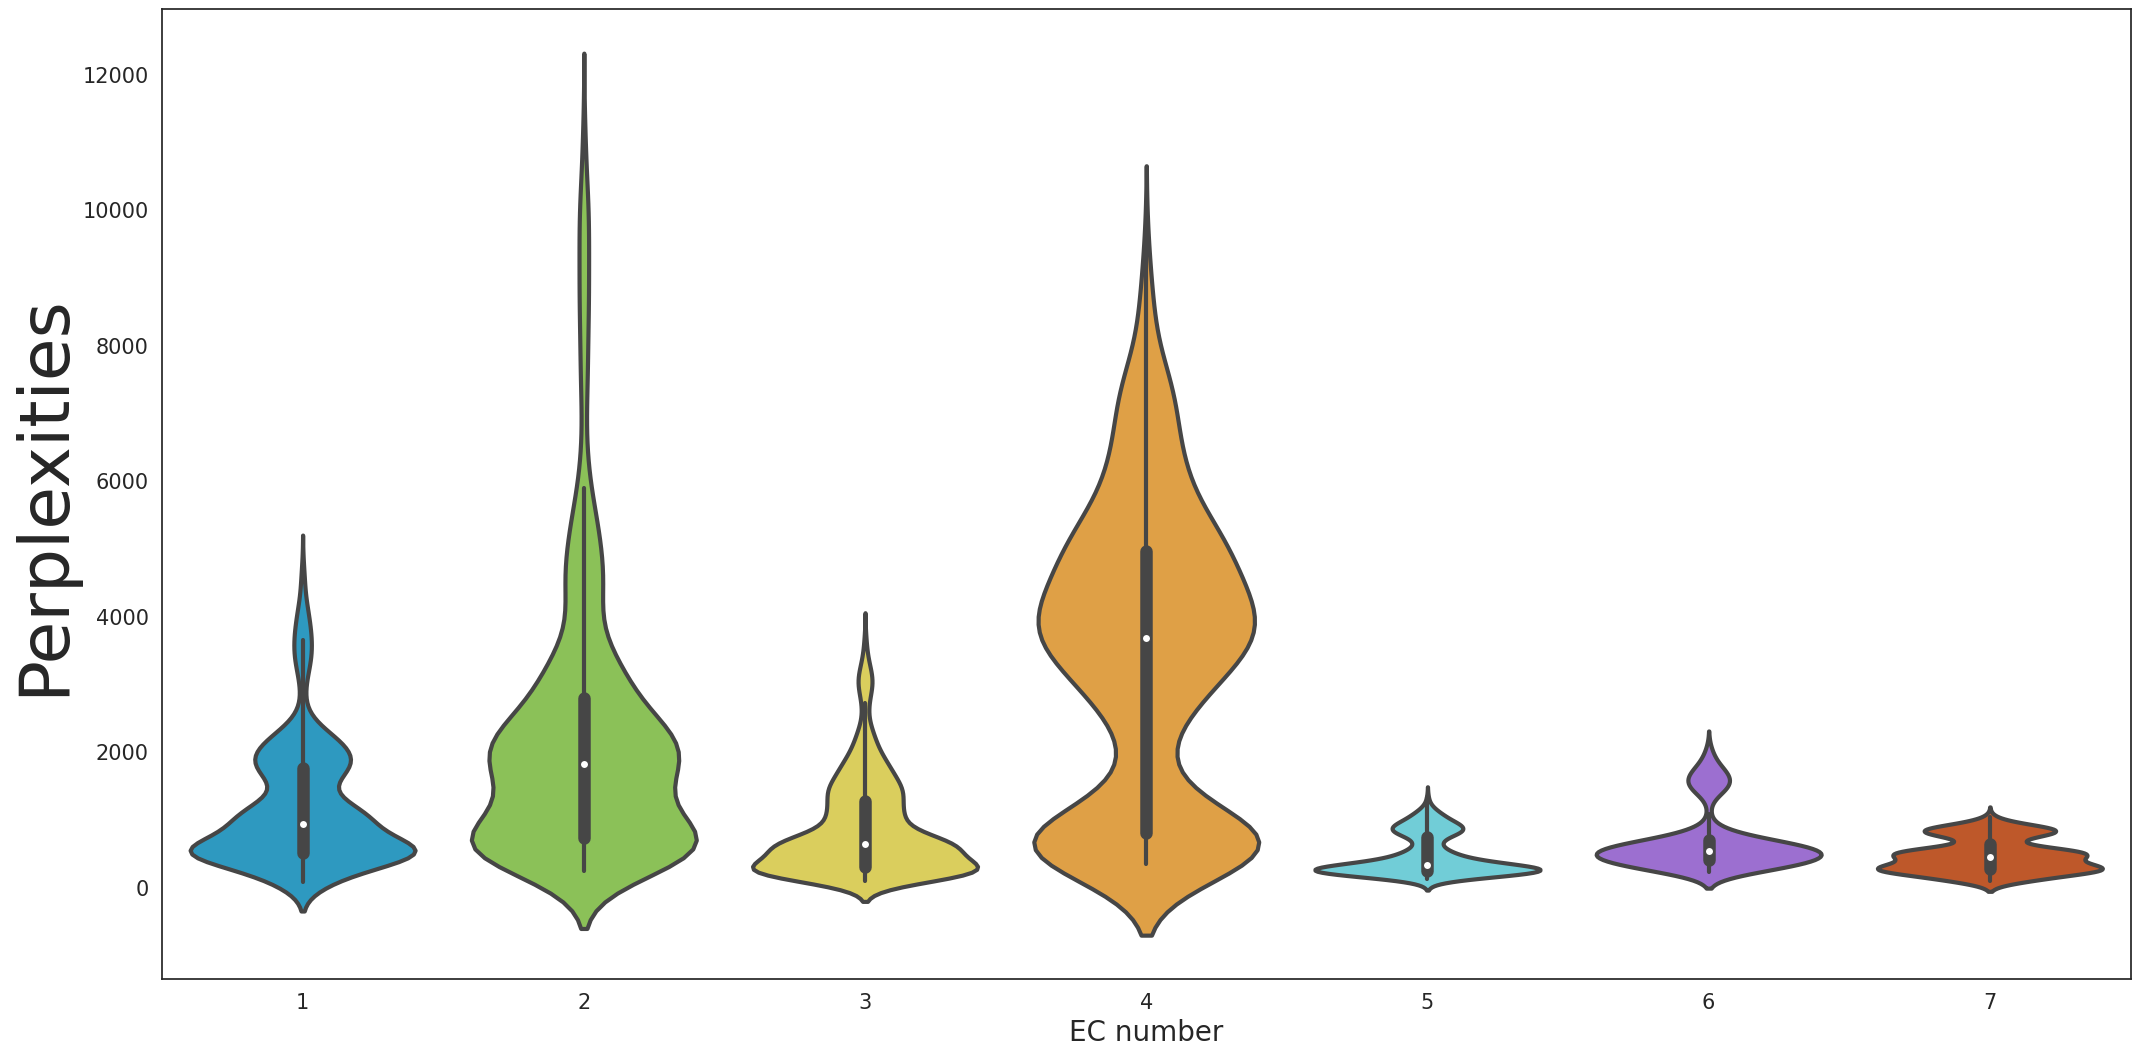

In [13]:
## replace '3.1.3.48',!!!
palette = ["#9b5fe0","#16a4d8","#60dbe8","#8bd346","#efdf48","#f9a52c","#d64e12"]

sns.set(rc={'figure.figsize':(25.4,12.6)})
sns.set_style("white")

plot = sns.violinplot(data=df, x="Type", y="Perplexities", hue="Type", 
                      palette=sns.color_palette(palette, 7),legend=False, dodge=False, linewidth=3, 
                      order = ['1','2','3','4','5','6','7'])
plot.legend_.remove()

plot.set_xlabel("EC number",fontsize=20)
plot.set_ylabel("Perplexities",fontsize=50)
plot.tick_params(labelsize=15)


In [15]:

import collections
collections.Counter(df['Type'])

Counter({'6': 600,
         '1': 1498,
         '5': 700,
         '2': 2498,
         '3': 2397,
         '4': 1298,
         '7': 400})